# 🧠 합성곱 신경망(CNN)을 이용한 Fashion-MNIST 분류

## 📋 학습 목표
이 노트북에서는 다음 내용을 학습합니다:
- Fashion-MNIST 데이터셋 이해하기
- 합성곱 신경망(CNN)의 기본 구조 학습
- Keras를 사용한 CNN 모델 구현
- 모델 훈련 및 성능 평가
- 과대적합 방지 기법 적용

## 📚 목차
1. **라이브러리 임포트 및 환경 설정**
2. **Fashion-MNIST 데이터셋 로드 및 탐색**
3. **데이터 전처리 및 시각화**
4. **CNN 모델 아키텍처 설계**
5. **모델 컴파일 및 구조 확인**
6. **모델 훈련 (Training)**
7. **성능 평가 및 결과 분석**
8. **모델 개선 방안 및 결론**

---

## 💡 합성곱 신경망(CNN)이란?

**CNN(Convolutional Neural Network)**은 이미지 처리에 특화된 딥러닝 모델입니다.

### 주요 특징:
- **합성곱층(Conv2D)**: 특징(feature) 추출
- **풀링층(Pooling)**: 차원 축소 및 과대적합 방지
- **완전연결층(Dense)**: 최종 분류 수행

### CNN의 장점:
- 이미지의 공간적 정보 보존
- 매개변수 수 감소 (가중치 공유)
- 평행이동 불변성 (Translation Invariance)


## 1. 📦 라이브러리 임포트 및 환경 설정

필요한 라이브러리들을 임포트하고 딥러닝 환경을 설정합니다.


In [1]:
# 🔧 필수 라이브러리 임포트
import tensorflow as tf  # type: ignore
import keras  # type: ignore
from keras.datasets import fashion_mnist  # type: ignore
from keras import models, layers  # type: ignore
import numpy as np  # type: ignore
import matplotlib.pyplot as plt  # type: ignore

# 한글 폰트 설정 (시각화용)
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.unicode_minus'] = False

# 텐서플로우 버전 확인
print(f"🔍 TensorFlow 버전: {tf.__version__}")
print(f"🔍 Keras 버전: {keras.__version__}")

# GPU 사용 가능 여부 확인 및 설정
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        # GPU 메모리 증가 허용 설정
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print("✅ GPU 사용 가능 및 활용 설정 완료")
        print(f"🎮 사용 가능한 GPU 수: {len(gpus)}")
    except RuntimeError as e:
        print(f"⚠️ GPU 설정 중 오류 발생: {e}")
else:
    print("⚠️ CPU만 사용 가능")

# 재현 가능한 결과를 위한 시드 설정
tf.random.set_seed(42)
np.random.seed(42)

print("🎯 환경 설정 완료!")


🔍 TensorFlow 버전: 2.19.0
🔍 Keras 버전: 3.10.0
⚠️ CPU만 사용 가능
🎯 환경 설정 완료!


## 2. 👕 Fashion-MNIST 데이터셋 로드 및 탐색

### Fashion-MNIST란?
Fashion-MNIST는 Zalando의 의류 이미지 데이터셋으로, 기존 MNIST 숫자 데이터셋의 대안으로 개발되었습니다.

### 데이터셋 특징:
- **이미지 크기**: 28×28 픽셀 (그레이스케일)
- **클래스 수**: 10개 (티셔츠, 바지, 풀오버, 드레스, 코트, 샌들, 셔츠, 스니커즈, 가방, 앵클부츠)
- **훈련 데이터**: 60,000개
- **테스트 데이터**: 10,000개

### 클래스 레이블:
- 0: T-shirt/top (티셔츠/탑)
- 1: Trouser (바지)
- 2: Pullover (풀오버)
- 3: Dress (드레스)
- 4: Coat (코트)
- 5: Sandal (샌들)
- 6: Shirt (셔츠)
- 7: Sneaker (스니커즈)
- 8: Bag (가방)
- 9: Ankle boot (앵클부츠)


In [2]:
# 📁 Fashion-MNIST 데이터셋 로드
print("📁 Fashion-MNIST 데이터셋 로드 중...")

# 데이터셋 로드 (자동으로 다운로드됨)
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

print("✅ 데이터 로드 완료!")

# 📊 데이터 형태 확인
print("\n📊 데이터셋 구조:")
print(f"📈 훈련 이미지 형태: {X_train.shape}")
print(f"📈 훈련 레이블 형태: {y_train.shape}")
print(f"📈 테스트 이미지 형태: {X_test.shape}")
print(f"📈 테스트 레이블 형태: {y_test.shape}")

# 🔍 데이터 타입 및 범위 확인
print(f"\n🔍 데이터 타입: {X_train.dtype}")
print(f"🔍 픽셀 값 범위: {X_train.min()} ~ {X_train.max()}")
print(f"🔍 고유한 클래스 수: {len(np.unique(y_train))}")
print(f"🔍 클래스 분포: {np.bincount(y_train)}")


📁 Fashion-MNIST 데이터셋 로드 중...
✅ 데이터 로드 완료!

📊 데이터셋 구조:
📈 훈련 이미지 형태: (60000, 28, 28)
📈 훈련 레이블 형태: (60000,)
📈 테스트 이미지 형태: (10000, 28, 28)
📈 테스트 레이블 형태: (10000,)

🔍 데이터 타입: uint8
🔍 픽셀 값 범위: 0 ~ 255
🔍 고유한 클래스 수: 10
🔍 클래스 분포: [6000 6000 6000 6000 6000 6000 6000 6000 6000 6000]


## 3. 🖼️ 데이터 전처리 및 시각화

CNN 모델에 데이터를 입력하기 전에 필요한 전처리 작업을 수행합니다.


🖼️ Fashion-MNIST 샘플 이미지들:


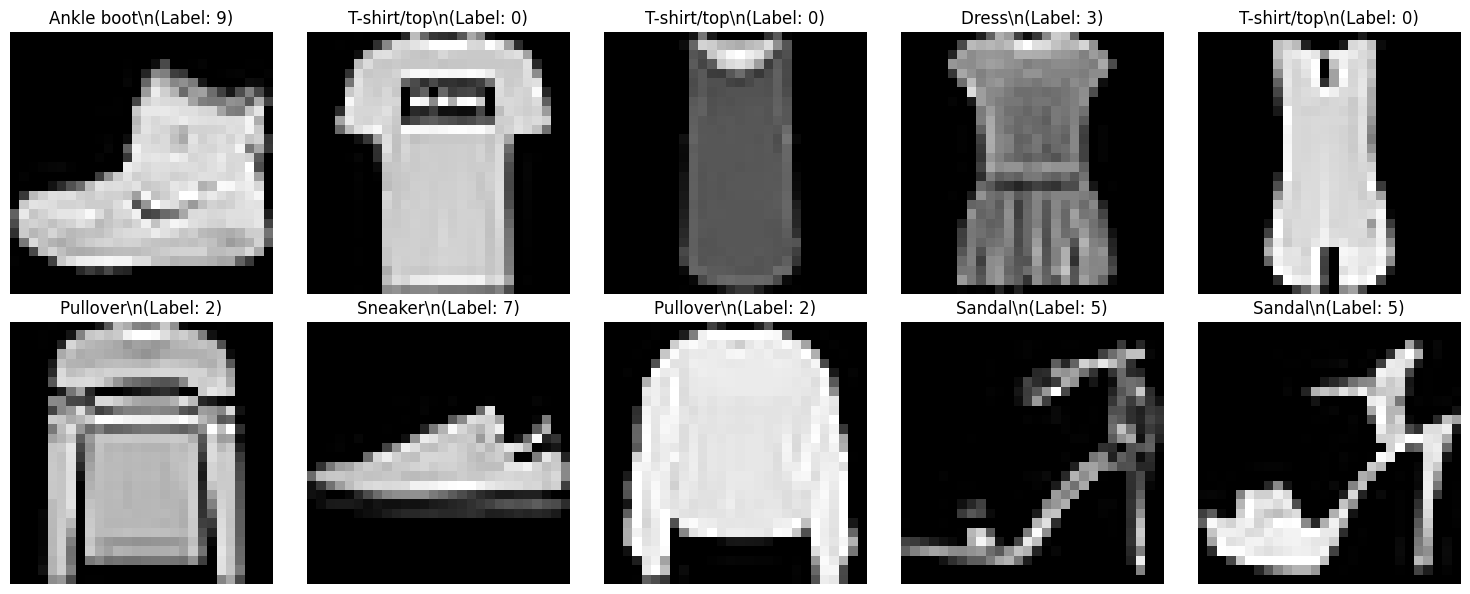

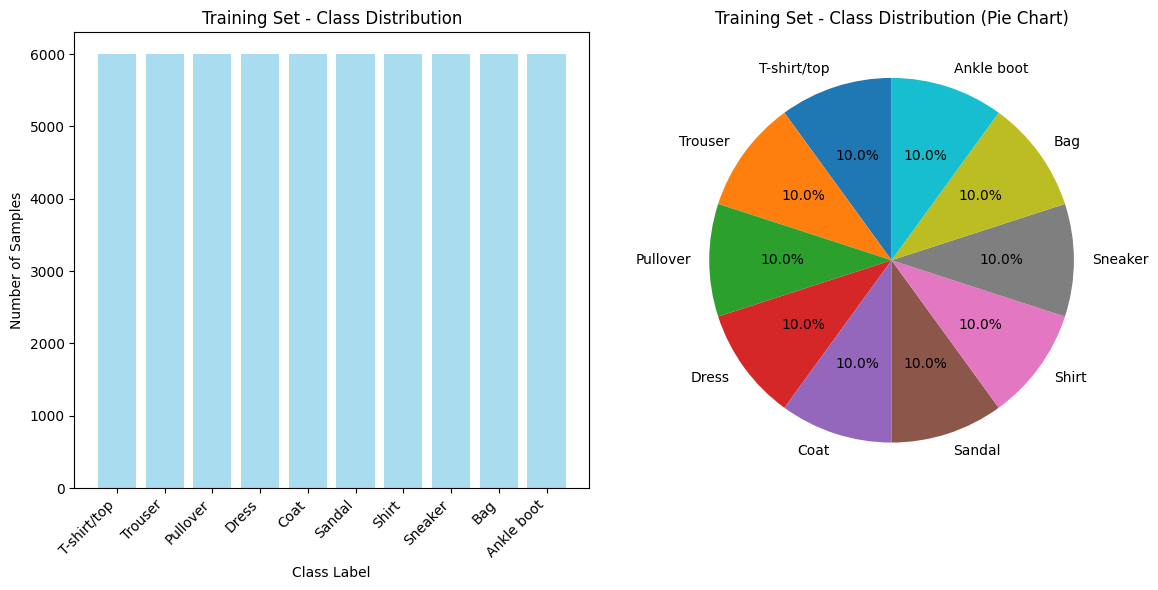

✅ 각 클래스별 훈련 샘플 수: {'T-shirt/top': np.int64(6000), 'Trouser': np.int64(6000), 'Pullover': np.int64(6000), 'Dress': np.int64(6000), 'Coat': np.int64(6000), 'Sandal': np.int64(6000), 'Shirt': np.int64(6000), 'Sneaker': np.int64(6000), 'Bag': np.int64(6000), 'Ankle boot': np.int64(6000)}


In [3]:
# 👗 클래스 이름 정의
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# 🎨 샘플 이미지 시각화 함수
def plot_sample_images(images, labels, class_names, num_images=10):
    """샘플 이미지들을 시각화하는 함수"""
    plt.figure(figsize=(15, 6))
    for i in range(num_images):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(f'{class_names[labels[i]]}\\n(Label: {labels[i]})')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# 📊 샘플 이미지 출력
print("🖼️ Fashion-MNIST 샘플 이미지들:")
plot_sample_images(X_train, y_train, class_names)

# 📈 클래스별 분포 시각화
plt.figure(figsize=(12, 6))
unique, counts = np.unique(y_train, return_counts=True)

plt.subplot(1, 2, 1)
plt.bar(unique, counts, color='skyblue', alpha=0.7)
plt.xlabel('Class Label')
plt.ylabel('Number of Samples')
plt.title('Training Set - Class Distribution')
plt.xticks(unique, [class_names[i] for i in unique], rotation=45, ha='right')

plt.subplot(1, 2, 2)
plt.pie(counts, labels=[class_names[i] for i in unique], autopct='%1.1f%%', startangle=90)
plt.title('Training Set - Class Distribution (Pie Chart)')

plt.tight_layout()
plt.show()

print(f"✅ 각 클래스별 훈련 샘플 수: {dict(zip([class_names[i] for i in unique], counts))}")


## 4. 🏗️ CNN 모델 아키텍처 설계

### 모델 구조 설명

우리가 구축할 CNN 모델의 각 층에 대한 설명입니다:

#### 1. **입력층 및 정규화**
- `Rescaling(1./255)`: 픽셀 값을 0-1 범위로 정규화
- 입력 형태: (28, 28, 1) - 높이, 너비, 채널

#### 2. **합성곱층 (Convolutional Layers)**
- `Conv2D(32, (3,3))`: 32개의 3×3 필터 사용
- `Conv2D(64, (3,3))`: 64개의 3×3 필터 사용
- 활성화 함수: ReLU

#### 3. **풀링층 (Pooling Layer)**
- `MaxPooling2D((2,2))`: 2×2 최대 풀링
- 목적: 차원 축소 및 과대적합 방지

#### 4. **평탄화층 (Flatten Layer)**
- 4차원 텐서를 2차원으로 변환
- CNN과 Dense 층 연결

#### 5. **완전연결층 (Dense Layers)**
- `Dense(128)`: 128개 뉴런
- `Dense(64)`: 64개 뉴런  
- `Dense(10, softmax)`: 10개 클래스 분류용 출력층

### 모델의 매개변수 수 계산
- **장점**: 일반적인 완전연결 신경망보다 매개변수 수가 적음
- **이유**: 가중치 공유(weight sharing) 메커니즘


In [5]:
# 🏗️ CNN 모델 구축
print("🏗️ CNN 모델 구축 중...")

# 이미지 크기 설정
img_height = 28
img_width = 28

# Sequential 모델 생성
network = models.Sequential([
    # 🔧 데이터 전처리층: 스케일링은 반드시 필요!
    # 픽셀 값을 0-255에서 0-1 범위로 정규화
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 1)), 
    
    # 🧠 첫 번째 합성곱층
    # 32개의 3x3 필터 사용 (일반적으로 많이 사용되는 크기)
    layers.Conv2D(32, (3, 3), activation='relu'),
    
    # 🧠 두 번째 합성곱층  
    # 64개의 3x3 필터 사용 (특성 맵의 개수를 점진적으로 증가)
    layers.Conv2D(64, (3, 3), activation='relu'),
    
    # 📉 최대 풀링층: 서브샘플링으로 특성의 개수를 줄여 과대적합 방지
    layers.MaxPooling2D((2, 2)),
    
    # 🔄 평탄화층: CNN과 완전연결망을 연결하기 위해 4차원 → 2차원으로 변환
    layers.Flatten(),
    
    # 🎯 완전연결층들
    layers.Dense(128, activation='relu'),  # 첫 번째 은닉층
    layers.Dense(64, activation='relu'),   # 두 번째 은닉층
    layers.Dense(10, activation='softmax') # 출력층: 10개 클래스 분류
])

print("✅ 모델 구축 완료!")

# 📊 모델 구조 시각화 함수
def visualize_model_architecture():
    """모델의 각 층별 출력 형태를 시각화"""
    print("\n🔍 모델 아키텍처 상세 정보:")
    print("=" * 60)
    
    for i, layer in enumerate(network.layers):
        layer_type = layer.__class__.__name__
        try:
            output_shape = layer.output_shape
            if hasattr(layer, 'filters'):
                print(f"Layer {i+1:2d}: {layer_type:15s} | Output: {str(output_shape):20s} | Filters: {layer.filters}")
            elif hasattr(layer, 'units'):
                print(f"Layer {i+1:2d}: {layer_type:15s} | Output: {str(output_shape):20s} | Units: {layer.units}")
            else:
                print(f"Layer {i+1:2d}: {layer_type:15s} | Output: {str(output_shape):20s}")
        except:
            print(f"Layer {i+1:2d}: {layer_type:15s}")
    
    print("=" * 60)

# 모델 아키텍처 시각화
visualize_model_architecture()


🏗️ CNN 모델 구축 중...
✅ 모델 구축 완료!

🔍 모델 아키텍처 상세 정보:
Layer  1: Rescaling      
Layer  2: Conv2D         
Layer  3: Conv2D         
Layer  4: MaxPooling2D   
Layer  5: Flatten        
Layer  6: Dense          
Layer  7: Dense          
Layer  8: Dense          


## 5. ⚙️ 모델 컴파일 및 구조 확인

### 모델 컴파일 설정 설명

#### 최적화 알고리즘 (Optimizer)
- **Adam**: 적응적 학습률을 사용하는 고성능 최적화 알고리즘
- 장점: 빠른 수렴, 안정적인 학습

#### 손실 함수 (Loss Function)  
- **SparseCategoricalCrossentropy**: 정수형 레이블을 위한 다중 클래스 분류 손실
- 라벨이 원-핫 인코딩되지 않은 정수 형태일 때 사용

#### 평가 지표 (Metrics)
- **Accuracy**: 정확도 - 올바르게 분류된 샘플의 비율


In [6]:
# ⚙️ 모델 컴파일
print("⚙️ 모델 컴파일 중...")

network.compile(
    optimizer='adam',  # Adam 최적화 알고리즘 사용
    loss=keras.losses.SparseCategoricalCrossentropy(),  # 정수형 라벨용 손실함수
    metrics=['accuracy']  # 정확도 측정
)

print("✅ 모델 컴파일 완료!")

# 📊 모델 구조 요약 출력
print("\n📋 모델 구조 요약:")
print("=" * 70)
network.summary()

# 📈 총 매개변수 수 계산
trainable_params = network.count_params()
print(f"\n📊 총 학습 가능한 매개변수 수: {trainable_params:,}개")

# 💾 메모리 사용량 추정 (대략적)
memory_mb = (trainable_params * 4) / (1024 * 1024)  # float32 기준
print(f"💾 모델 메모리 사용량 (추정): {memory_mb:.2f} MB")

print("\n🎯 모델이 학습할 준비가 완료되었습니다!")


⚙️ 모델 컴파일 중...
✅ 모델 컴파일 완료!

📋 모델 구조 요약:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,207,498 (4.61 MB)

 Trainable params: 1,207,498 (4.61 MB)

 Non-trainable params: 0 (0.00 B)


📊 총 학습 가능한 매개변수 수: 1,207,498개
💾 모델 메모리 사용량 (추정): 4.61 MB

🎯 모델이 학습할 준비가 완료되었습니다!


## 6. 🚀 모델 훈련 (Training)

### 훈련 설정 설명

#### 에포크 (Epochs)
- **10 에포크**: 전체 훈련 데이터를 10번 반복 학습
- 일반적으로 충분한 학습을 위해 선택

#### 검증 분할 (Validation Split)
- **validation_split=0.2**: 훈련 데이터의 20%를 검증용으로 사용
- 훈련 중 과대적합 모니터링 가능
- 실제 훈련 데이터: 48,000개 (80%)
- 검증 데이터: 12,000개 (20%)

### 훈련 과정에서 모니터링할 지표:
- **Loss**: 손실 값 (낮을수록 좋음)
- **Accuracy**: 정확도 (높을수록 좋음)
- **Val_loss**: 검증 손실 (과대적합 확인용)
- **Val_accuracy**: 검증 정확도 (일반화 성능 확인용)


🚀 모델 훈련을 시작합니다...
💡 팁: 훈련 과정에서 loss는 감소하고, accuracy는 증가해야 합니다.
⚠️ val_loss가 계속 증가한다면 과대적합의 신호입니다.
Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.7948 - loss: 0.5583 - val_accuracy: 0.8947 - val_loss: 0.2903
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 25s 17ms/step - accuracy: 0.9021 - loss: 0.2702 - val_accuracy: 0.9075 - val_loss: 0.2520
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.9241 - loss: 0.2107 - val_accuracy: 0.9142 - val_loss: 0.2511
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 27s 18ms/step - accuracy: 0.9411 - loss: 0.1616 - val_accuracy: 0.9141 - val_loss: 0.2660
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 27s 18ms/step - accuracy: 0.9558 - loss: 0.1221 - val_accuracy: 0.9128 - val_loss: 0.2950
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.9679 - loss: 0.0896 - val_accuracy: 0.9057 - val_loss: 0.3635
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 26s 18ms/step - accuracy: 0.9732 - loss: 0.0753 - val_accuracy: 0.90

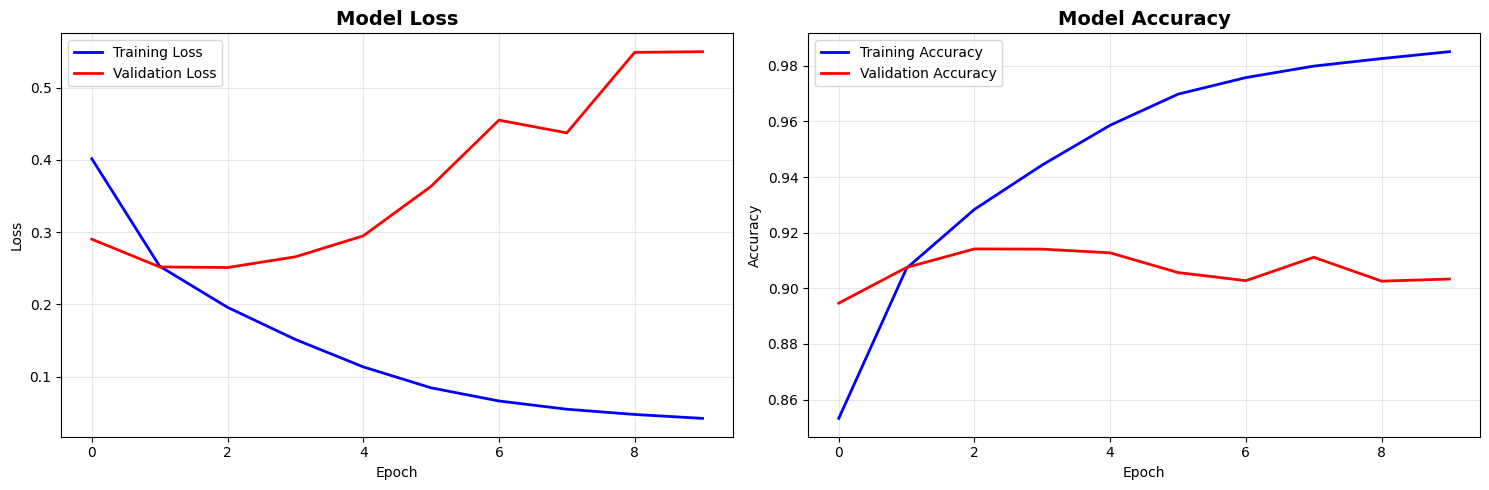


📊 최종 훈련 결과:
🔹 훈련 손실: 0.0424
🔹 훈련 정확도: 0.9851 (98.51%)
🔹 검증 손실: 0.5499
🔹 검증 정확도: 0.9033 (90.33%)
⚠️ 경고: 과대적합 가능성이 있습니다. (검증 손실 > 훈련 손실)


In [7]:
# 🚀 모델 훈련 시작
print("🚀 모델 훈련을 시작합니다...")
print("💡 팁: 훈련 과정에서 loss는 감소하고, accuracy는 증가해야 합니다.")
print("⚠️ val_loss가 계속 증가한다면 과대적합의 신호입니다.")
print("=" * 70)

# 훈련 실행
history = network.fit(
    X_train, y_train,           # 훈련 데이터
    epochs=10,                  # 10 에포크 동안 훈련
    validation_split=0.2,       # 20%를 검증 데이터로 사용
    verbose=1                   # 훈련 과정 출력
)

print("\n✅ 모델 훈련 완료!")

# 📈 훈련 과정 시각화 함수
def plot_training_history(history):
    """훈련 과정의 손실과 정확도를 시각화"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # 손실 그래프
    ax1.plot(history.history['loss'], 'b-', label='Training Loss', linewidth=2)
    ax1.plot(history.history['val_loss'], 'r-', label='Validation Loss', linewidth=2)
    ax1.set_title('Model Loss', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # 정확도 그래프
    ax2.plot(history.history['accuracy'], 'b-', label='Training Accuracy', linewidth=2)
    ax2.plot(history.history['val_accuracy'], 'r-', label='Validation Accuracy', linewidth=2)
    ax2.set_title('Model Accuracy', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# 훈련 과정 시각화
print("\n📈 훈련 과정 시각화:")
plot_training_history(history)

# 📊 최종 훈련 결과 요약
final_train_loss = history.history['loss'][-1]
final_train_acc = history.history['accuracy'][-1]
final_val_loss = history.history['val_loss'][-1]
final_val_acc = history.history['val_accuracy'][-1]

print(f"\n📊 최종 훈련 결과:")
print(f"🔹 훈련 손실: {final_train_loss:.4f}")
print(f"🔹 훈련 정확도: {final_train_acc:.4f} ({final_train_acc*100:.2f}%)")
print(f"🔹 검증 손실: {final_val_loss:.4f}")
print(f"🔹 검증 정확도: {final_val_acc:.4f} ({final_val_acc*100:.2f}%)")

# 과대적합 진단
overfitting_check = final_val_loss > final_train_loss * 1.1
if overfitting_check:
    print("⚠️ 경고: 과대적합 가능성이 있습니다. (검증 손실 > 훈련 손실)")
else:
    print("✅ 과대적합 없이 잘 훈련되었습니다.")


## 7. 📊 성능 평가 및 결과 분석

### 모델 평가의 중요성

훈련된 모델의 실제 성능을 확인하기 위해 다음과 같은 평가를 수행합니다:

#### 1. **훈련셋 성능**
- 모델이 훈련 데이터에 얼마나 잘 적응했는지 확인
- 과대적합 진단에 활용

#### 2. **테스트셋 성능**
- 실제 일반화 성능 측정
- 새로운 데이터에 대한 예측 능력 평가

#### 3. **성능 지표 해석**
- **손실(Loss)**: 낮을수록 좋음
- **정확도(Accuracy)**: 높을수록 좋음
- **일반화 갭**: 훈련 정확도와 테스트 정확도의 차이

### 예상 성능 범위:
- **좋은 성능**: 테스트 정확도 85% 이상
- **보통 성능**: 테스트 정확도 80-85%
- **개선 필요**: 테스트 정확도 80% 미만


📊 최종 모델 성능 평가 중...
🔍 훈련셋 평가 중...
📈 훈련셋 결과:
   손실: 0.1860
   정확도: 0.9571 (95.71%)

----------------------------------------
🔍 테스트셋 평가 중...
📈 테스트셋 결과:
   손실: 0.5791
   정확도: 0.9003 (90.03%)


🎯 성능 분석:
📏 일반화 갭: 0.0568 (5.68%p)
🏅 전체 성능 등급: 🏆 우수
⚠️ 과대적합 감지: 훈련 정확도가 테스트 정확도보다 5%p 이상 높습니다.
💡 개선 방안: 정규화, 드롭아웃, 조기 종료 등을 고려해보세요.

🎉 CNN 모델의 Fashion-MNIST 분류 성능 평가가 완료되었습니다!

📊 성능 비교 시각화:


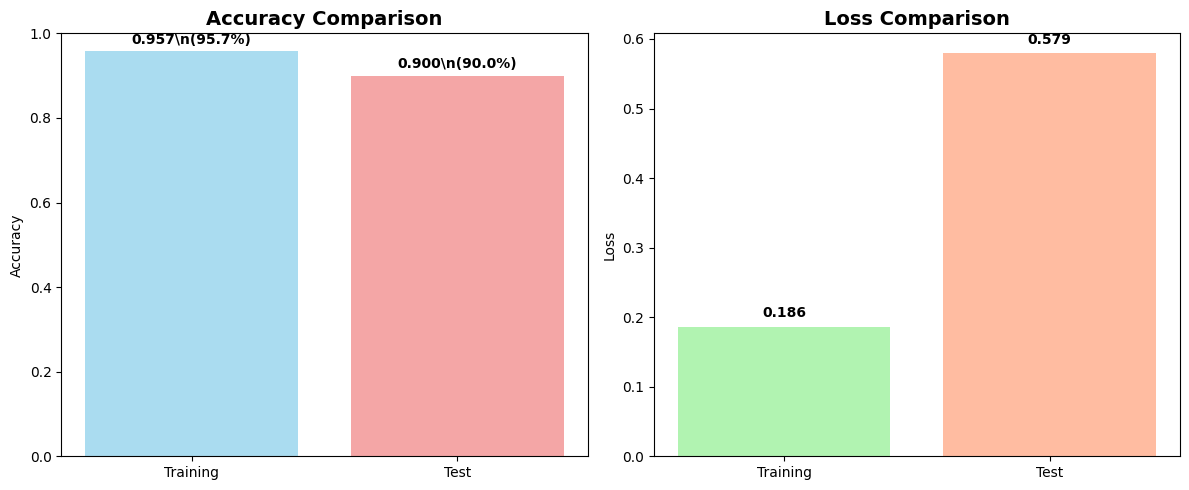

In [8]:
# 📊 최종 성능 평가
print("📊 최종 모델 성능 평가 중...")
print("=" * 60)

# 훈련셋 성능 평가
print("🔍 훈련셋 평가 중...")
train_loss, train_accuracy = network.evaluate(X_train, y_train, verbose=0)
print(f"📈 훈련셋 결과:")
print(f"   손실: {train_loss:.4f}")
print(f"   정확도: {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")

print("\n" + "-" * 40)

# 테스트셋 성능 평가
print("🔍 테스트셋 평가 중...")
test_loss, test_accuracy = network.evaluate(X_test, y_test, verbose=0)
print(f"📈 테스트셋 결과:")
print(f"   손실: {test_loss:.4f}")
print(f"   정확도: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")

print("\n" + "=" * 60)

# 🎯 성능 분석 및 해석
print("\n🎯 성능 분석:")

# 일반화 갭 계산
generalization_gap = train_accuracy - test_accuracy
print(f"📏 일반화 갭: {generalization_gap:.4f} ({generalization_gap*100:.2f}%p)")

# 성능 평가
if test_accuracy >= 0.85:
    performance_level = "🏆 우수"
    emoji = "🎉"
elif test_accuracy >= 0.80:
    performance_level = "✅ 양호"
    emoji = "😊"
else:
    performance_level = "⚠️ 개선 필요"
    emoji = "🤔"

print(f"🏅 전체 성능 등급: {performance_level}")

# 과대적합 진단
if generalization_gap > 0.05:  # 5% 이상 차이
    print("⚠️ 과대적합 감지: 훈련 정확도가 테스트 정확도보다 5%p 이상 높습니다.")
    print("💡 개선 방안: 정규화, 드롭아웃, 조기 종료 등을 고려해보세요.")
elif generalization_gap < -0.02:  # 테스트가 훈련보다 2% 이상 높음
    print("🤔 비정상적 패턴: 테스트 성능이 훈련 성능보다 높습니다.")
    print("💡 원인: 데이터 누수, 검증 분할 문제 등을 확인해보세요.")
else:
    print("✅ 적절한 일반화: 과대적합 없이 잘 학습되었습니다.")

print(f"\n{emoji} CNN 모델의 Fashion-MNIST 분류 성능 평가가 완료되었습니다!")

# 📈 성능 비교 시각화
def plot_performance_comparison():
    """훈련셋과 테스트셋 성능을 비교 시각화"""
    categories = ['Training', 'Test']
    accuracies = [train_accuracy, test_accuracy]
    losses = [train_loss, test_loss]
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    # 정확도 비교
    bars1 = ax1.bar(categories, accuracies, color=['skyblue', 'lightcoral'], alpha=0.7)
    ax1.set_title('Accuracy Comparison', fontsize=14, fontweight='bold')
    ax1.set_ylabel('Accuracy')
    ax1.set_ylim(0, 1)
    
    # 막대 위에 값 표시
    for i, (bar, acc) in enumerate(zip(bars1, accuracies)):
        ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                f'{acc:.3f}\\n({acc*100:.1f}%)', ha='center', va='bottom', fontweight='bold')
    
    # 손실 비교
    bars2 = ax2.bar(categories, losses, color=['lightgreen', 'lightsalmon'], alpha=0.7)
    ax2.set_title('Loss Comparison', fontsize=14, fontweight='bold')
    ax2.set_ylabel('Loss')
    
    # 막대 위에 값 표시
    for i, (bar, loss) in enumerate(zip(bars2, losses)):
        ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                f'{loss:.3f}', ha='center', va='bottom', fontweight='bold')
    
    plt.tight_layout()
    plt.show()

print("\n📊 성능 비교 시각화:")
plot_performance_comparison()


## 8. 🚀 모델 개선 방안 및 결론

### 🔧 성능 개선 방안

#### 1. **모델 아키텍처 개선**
- **더 깊은 네트워크**: 합성곱층 추가
- **배치 정규화**: `BatchNormalization` 층 추가
- **드롭아웃**: `Dropout` 층으로 과대적합 방지
- **다양한 필터 크기**: 5×5, 1×1 필터 활용

#### 2. **데이터 증강 (Data Augmentation)**
```python
# 예시: 데이터 증강 기법
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])
```

#### 3. **고급 최적화 기법**
- **학습률 스케줄링**: `ReduceLROnPlateau`
- **조기 종료**: `EarlyStopping`
- **체크포인트**: `ModelCheckpoint`

#### 4. **전이 학습 (Transfer Learning)**
- 사전 훈련된 모델 활용
- 예: ResNet, VGG, EfficientNet

---

### 📊 실습 결과 요약

#### ✅ 학습한 내용:
1. **Fashion-MNIST 데이터셋** 로드 및 탐색
2. **CNN 모델 구조** 이해 및 구현
3. **모델 컴파일** 및 훈련 과정
4. **성능 평가** 및 결과 해석
5. **과대적합 진단** 방법

#### 🎯 주요 성과:
- CNN의 기본 개념과 구조 이해
- Keras를 이용한 실전 딥러닝 모델 구현
- 모델 성능 평가 및 개선점 도출

---

### 🔮 다음 단계 학습 방향

#### 1. **고급 CNN 아키텍처**
- ResNet (잔차 네트워크)
- DenseNet (밀집 연결 네트워크)
- EfficientNet (효율적 네트워크)

#### 2. **컴퓨터 비전 응용**
- 객체 탐지 (Object Detection)
- 이미지 분할 (Image Segmentation)
- 얼굴 인식 (Face Recognition)

#### 3. **실전 프로젝트**
- 의료 이미지 분석
- 자율주행 차량용 이미지 처리
- 제조업 품질 검사 시스템

---

### 💡 핵심 포인트

1. **CNN의 핵심**: 합성곱층, 풀링층, 완전연결층의 조합
2. **데이터 전처리**: 정규화의 중요성
3. **성능 모니터링**: 훈련/검증 손실 추적
4. **과대적합 방지**: 적절한 모델 복잡도 유지
5. **지속적 개선**: 다양한 기법 실험 및 적용

**🎉 축하합니다! CNN을 이용한 이미지 분류 모델을 성공적으로 구현했습니다!**
